In [169]:
# read data
islands = read.csv("islands.csv")
head(islands)

Name              dis.isl.MT dist.isl.MF dist.group mean.height size no.ramet
1 Generalsgrundet2   231        231        230.78852  43.00       0.09 60      
2 Spikarna2         1106       1500         75.73528  18.67       0.82 48      
3 VI2                155        305         66.75000  40.00       1.84 24      
4 Stensundsklobben1  275        105          5.29000  43.42       1.09 94      
5 Stensundsklobben2  310        105        104.60750  22.50       0.15  4      
6 Pargrunden2        432        282        281.58354  20.00       0.12 32      
  no.group dist.land no.hab trees dens.ramet dens.group mt.presence mf.presence
1 1         115      2      0     666.66667  11.111111  0           1          
2 1        2260      2      0      58.53659   1.219512  0           0          
3 3        1018      2      1      13.04348   1.630435  0           0          
4 4         163      4      1      86.23853   3.669725  0           1          
5 1          87      1      0      26.66667   6.666667  0           1          
6 1         179      1      0     266.66667   8.333333  0           0

In [170]:
#estimate parameter for original data with backward selection
islands.glm <- glm(mf.presence~1+dis.isl.MT + dist.group + mean.height + dist.land + no.hab + dens.ramet + dens.group + 
                   dens.ramet:dis.isl.MT + dens.group:dis.isl.MT + dens.ramet:dist.land + dens.group:dist.land + dist.land:dis.isl.MT
                   + no.hab:dens.group + no.hab:dens.ramet , data=islands,family="binomial")
summary(islands.glm)
islands.glm.back = step(islands.glm,direction = "backward")


Call:
glm(formula = mf.presence ~ 1 + dis.isl.MT + dist.group + mean.height + 
    dist.land + no.hab + dens.ramet + dens.group + dens.ramet:dis.isl.MT + 
    dens.group:dis.isl.MT + dens.ramet:dist.land + dens.group:dist.land + 
    dist.land:dis.isl.MT + no.hab:dens.group + no.hab:dens.ramet, 
    family = "binomial", data = islands)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0231  -0.6375   0.2357   0.6217   2.0072  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)   
(Intercept)           -3.215e+00  3.251e+00  -0.989  0.32260   
dis.isl.MT            -4.888e-03  6.159e-03  -0.794  0.42744   
dist.group             2.844e-03  5.923e-03   0.480  0.63112   
mean.height            3.094e-02  4.287e-02   0.722  0.47048   
dist.land              5.395e-04  1.608e-03   0.335  0.73729   
no.hab                 1.259e+00  4.653e-01   2.706  0.00682 **
dens.ramet             3.677e-04  3.333e-04   1.103  0.26986   
dens.group          

Start:  AIC=80.11
mf.presence ~ 1 + dis.isl.MT + dist.group + mean.height + dist.land + 
    no.hab + dens.ramet + dens.group + dens.ramet:dis.isl.MT + 
    dens.group:dis.isl.MT + dens.ramet:dist.land + dens.group:dist.land + 
    dist.land:dis.isl.MT + no.hab:dens.group + no.hab:dens.ramet

                        Df Deviance    AIC
- dis.isl.MT:dens.group  1   50.145 78.145
- dis.isl.MT:dens.ramet  1   50.153 78.153
- dis.isl.MT:dist.land   1   50.200 78.200
- dist.land:dens.ramet   1   50.270 78.270
- dist.group             1   50.339 78.339
- no.hab:dens.group      1   50.346 78.346
- mean.height            1   50.658 78.658
- no.hab:dens.ramet      1   50.658 78.658
<none>                       50.106 80.106
- dist.land:dens.group   1   54.659 82.659

Step:  AIC=78.15
mf.presence ~ dis.isl.MT + dist.group + mean.height + dist.land + 
    no.hab + dens.ramet + dens.group + dis.isl.MT:dens.ramet + 
    dist.land:dens.ramet + dist.land:dens.group + dis.isl.MT:dist.land + 
    no.hab

In [171]:
# define new design matrix
newdesignmatrix = islands[sample(nrow(islands), 59), ]

# estimate parameter for the data of desing matrix
newmod_newdesignmatrix <- glm(mf.presence ~1+dis.isl.MT  + dist.land + no.hab + dens.ramet + dens.group+ dist.land:dens.group + 
                   no.hab:dens.ramet, data=newdesignmatrix, family=binomial(link="logit") )

# calculate inverse fisher information
inv_Fisher_inf = vcov(newmod)
inv_Fisher_inf

# list for datas of the model
summarylist_newdesignmatrix =  summary(newmod_newdesignmatrix)$coef
summarylist_newdesignmatrix
summarylist_newdesignmatrix[1,1]

(Intercept)   dis.isl.MT    dist.land     no.hab       
(Intercept)           7.0889855572  3.504341e-04 -2.920316e-03 -1.407563e+00
dis.isl.MT            0.0003504341  4.531893e-06 -9.918875e-07 -3.461045e-04
dist.land            -0.0029203165 -9.918875e-07  1.784510e-06  5.483362e-04
no.hab               -1.4075631302 -3.461045e-04  5.483362e-04  3.600550e-01
dens.ramet           -0.0004997733 -2.699520e-08  1.667856e-07  1.135920e-04
dens.group           -0.2366188633 -8.288090e-05  1.368665e-04  4.366682e-02
dist.land:dens.group  0.0004672471  1.554897e-07 -2.554544e-07 -1.094686e-04
no.hab:dens.ramet     0.0001211750  1.001586e-08 -4.187537e-08 -2.822847e-05
                     dens.ramet    dens.group    dist.land:dens.group
(Intercept)          -4.997733e-04 -2.366189e-01  4.672471e-04       
dis.isl.MT           -2.699520e-08 -8.288090e-05  1.554897e-07       
dist.land             1.667856e-07  1.368665e-04 -2.554544e-07       
no.hab                1.135920e-04  4.366682e-02 -1.094686e-04       
dens.ramet            8.647085e-08  1.071735e-05 -2.547941e-08       
dens.group            1.071735e-05  1.559911e-02 -2.510756e-05       
dist.land:dens.group -2.547941e-08 -2.510756e-05  5.455570e-08       
no.hab:dens.ramet    -1.970031e-08 -2.792973e-06  6.424164e-09       
                     no.hab:dens.ramet
(Intercept)           1.211750e-04    
dis.isl.MT            1.001586e-08    
dist.land            -4.187537e-08    
no.hab               -2.822847e-05    
dens.ramet           -1.970031e-08    
dens.group           -2.792973e-06    
dist.land:dens.group  6.424164e-09    
no.hab:dens.ramet     4.639253e-09

Estimate      Std. Error   z value   Pr(>|z|)   
(Intercept)          -1.929952e+00 1.497186e+00 -1.289053 0.197379599
dis.isl.MT           -3.735500e-03 2.201862e-03 -1.696519 0.089787679
dist.land             1.114839e-03 8.329119e-04  1.338483 0.180738944
no.hab                1.093154e+00 3.365198e-01  3.248408 0.001160527
dens.ramet            3.303229e-04 2.406980e-04  1.372354 0.169953264
dens.group            9.726491e-02 8.024876e-02  1.212043 0.225496087
dist.land:dens.group -3.538777e-04 1.314850e-04 -2.691392 0.007115460
no.hab:dens.ramet    -7.867949e-05 5.356904e-05 -1.468750 0.141900745

[1] -1.929952

In [172]:
# start simulation
set.seed(1)
#number pseudo observations
simanz <- 100

#number coeffizients
m = length(coef(islands.glm.back))
#m

# matrix to save parameters, that are estimated for the different pseudoobservations
parameter = matrix(0, simanz, m)

# number of rows of designmatrix
n <- nrow(newdesignmatrix)
#n

# calculate expaction value (assume the estimated parameters from the origninal model as true parameter - not sure wheter that one of the newdesignmatrix model)
mu <- predict(newmod_newdesignmatrix, type="response", newdata=newdesignmatrix)
#mu

In [173]:
# for samplesize smaller than 50 the glm() algorithm does not converge

for (i in 1:simanz)
 {
 ### Simulation of pseudo observations
 y.sim <- rbinom(n,1, prob = mu)
 print(y.sim)
 ### estimation parameters
 newmod <- glm(y.sim~1+dis.isl.MT  + dist.land + no.hab + dens.ramet + dens.group+ dist.land:dens.group + 
                   no.hab:dens.ramet, data=newdesignmatrix, family=binomial(link="logit") )
 ### storage parameters 
 summarylist =  summary(newmod)$coef
        for (p in 1:m){
            parameter[i,p] = summarylist[p,1]}
    }


 [1] 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1
[39] 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 [1] 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1
[39] 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 [1] 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
[39] 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1
 [1] 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1
[39] 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 [1] 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
[39] 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 [1] 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
[39] 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 [1] 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1
[39] 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1
 [1] 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1
[39] 0 0 1 0 1 1 1 1 1 

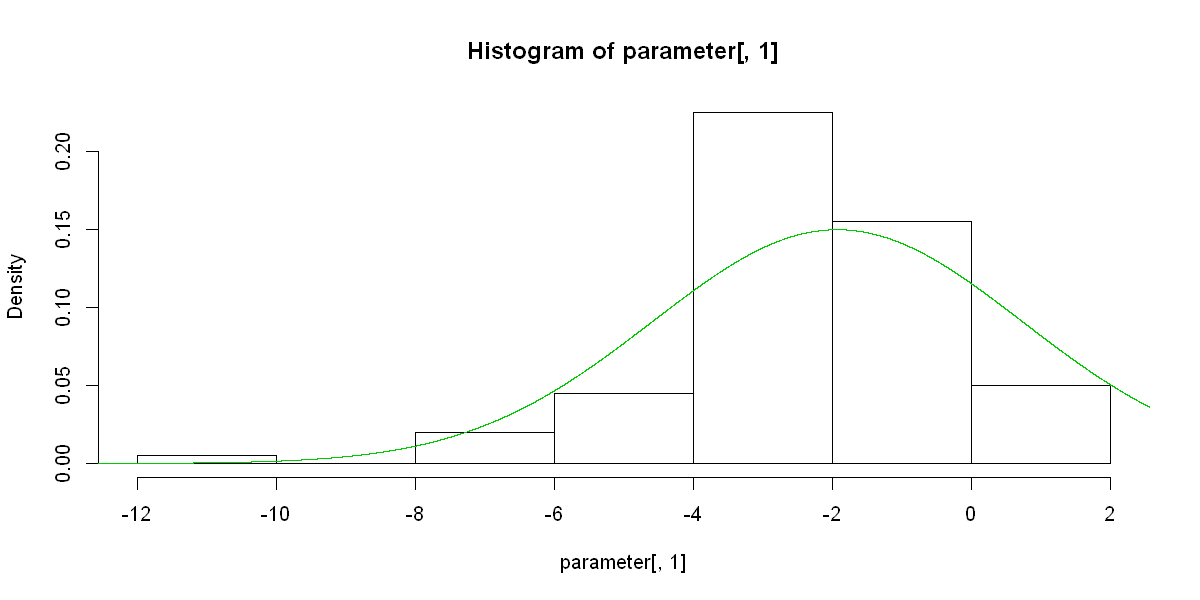

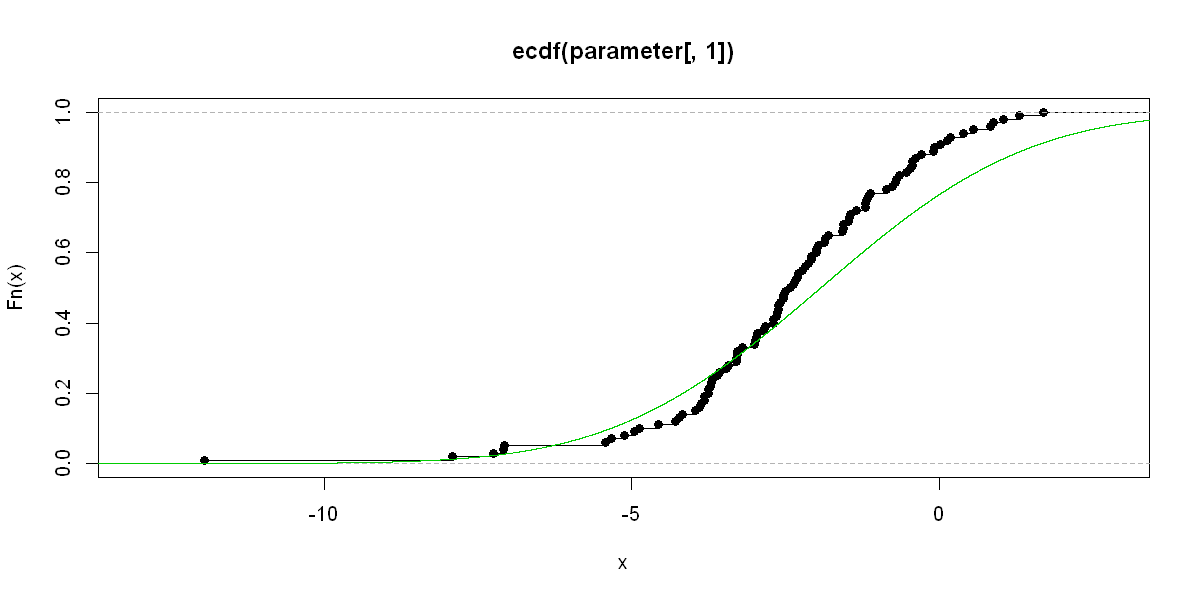

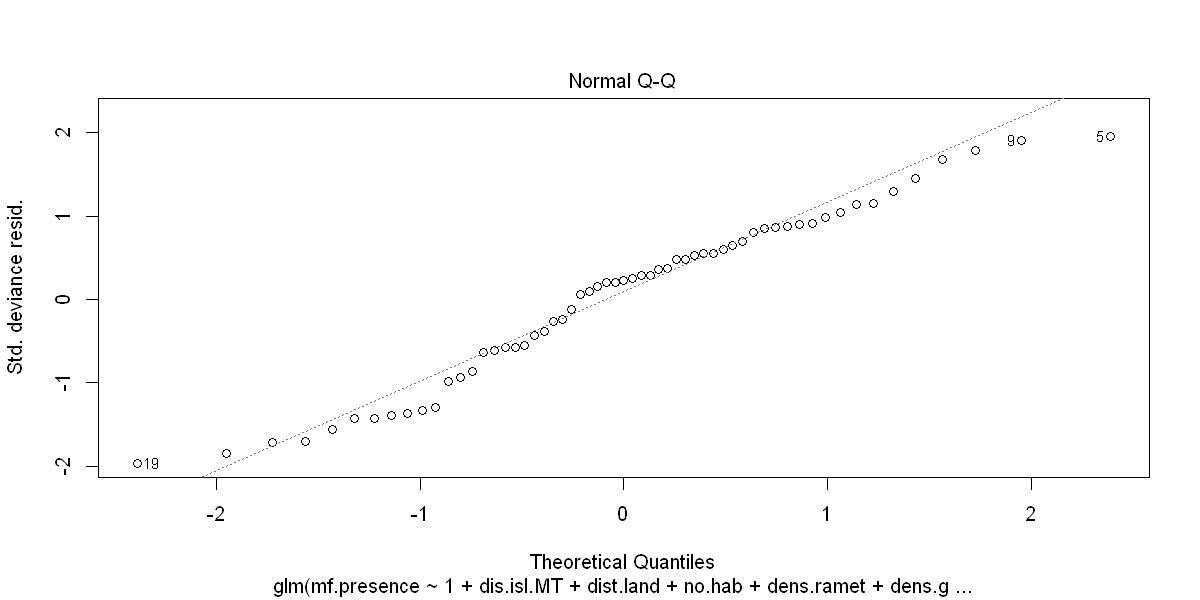

In [174]:
# plot distribution for [,1], that means the intercept parameter 

hist(parameter[,1], freq = F)
z <- seq(-100, 100, 0.001)
# for normaldistribution use the intercept parameter of the newdesignmatix model und for the standart deviation use  sqrt(inv_Fisher_inf[1,1]),
#i.e. the diagonal entries of the inverse fisher information matrix, because that are the varianzes
points(z, dnorm(z, mean =  summarylist_newdesignmatrix[1,1], sd = sqrt(inv_Fisher_inf[1,1])), type = "l", col = 3)

#Empirical cumulative distribution plot
plot(ecdf(parameter[,1]))
points(z, pnorm(z,  mean =  summarylist_newdesignmatrix[1,1], sd = sqrt(inv_Fisher_inf[1,1])), type = "l", col = 3)

#qq plot - examine how well the normal distribution ist: the poits should lay on the line
options(repr.plot.width = 10, repr.plot.height = 5)
#par(mfrow = c(1, 2))
plot(newmod_newdesignmatrix, which = 2)
#options(repr.plot.width = 5, repr.plot.height = 5)
